# Mel Spectrogram
# 음성의 특징 추출 방법은 2가지 1.Mel-Spectrogram, 2. MFCC

In [36]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

wav_file = './data/super_son/NB10584578.wav'

y (2510294,) sr 16000
Wav length: 156.893375, Mel_S shape:(40, 15690)


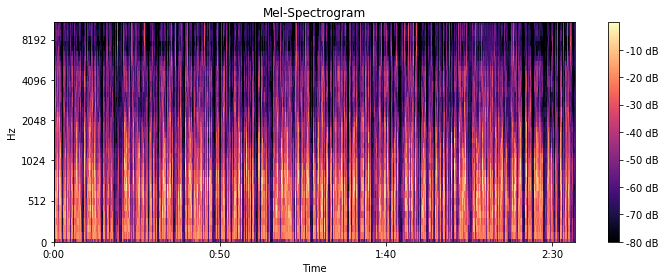

In [17]:
frame_length = 0.025
frame_stride = 0.010

# mel-spectrogram 함수
def Mel_S(wav_file):
    y, sr = librosa.load(wav_file, sr=16000)
    
    print('y', y.shape, 'sr', sr)
    # y: audio time-series
    # sr: sampling rate of y

    # wav_length = len(y)/sr

    '''
    우리가 보유한 음성 데이터는 현재 time-magnitude domain이다.
    이걸 왜 frequency로 바꿔주나면 주파수 관점에서 바라보았을 때 얻을 수 있는 정보가 많기 때문이다.
    
    n_fft
    음성의 길이를 얼마만큼으로 자를 것인가? 이를 window라고 한다.
    sampling Rate가 16000이고, 우리는 n_fft를 512라고 가정하면
    frame_length = 512/16000 = 0.032 => 32ms가 나온다.
    1개의 window의 크기를 32ms => window_length가 된다.
    '''
    input_nfft = int(round(sr*frame_length))

    '''
    
    hop_length: 음성의 magnitude를 얼만큼 겹친 상태로 잘라서 칸으로 보여줄 것인가? 
    예를 들어 우리가 보유한 데이터가 7초이고, window_length를 0.025초,
    frame_stride를 0.010초(10ms)단위로 뽑는다고 가정하면, 1칸은 0.015초(15ms)가 겹치도록 하여 총 700칸을 얻을 수 있다.
    '''
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()
    
    return S
    
S = Mel_S(wav_file)

In [26]:
S.shape

(40, 15690)

In [31]:
y = librosa.feature.inverse.mel_to_audio(S, sr=16000, n_fft=input_nfft, hop_length=input_stride)

In [34]:
y.shape

(2510240,)

In [35]:
librosa.output.write_wav('mel_output.wav', y, sr=16000)

# default 값

In [42]:
path = '../audio_vae/audio_vae/son/train_5seconds/son/NB10584578.wav_0.05.wav'

In [43]:
y, sr = librosa.load(path)
print(y.shape, sr)
S = librosa.feature.melspectrogram(y=y, sr=sr)
print(S.shape)

(172976,) 22050
(128, 338)


In [44]:
last = librosa.feature.inverse.mel_to_audio(S)

In [46]:
librosa.output.write_wav('mel_output.wav', last, sr=sr)

In [5]:
plt.plot(bins)

NameError: name 'bins' is not defined

In [6]:
y, sr = librosa.load(wav_file, sr=16000)
input_nfft = int(round(sr*frame_length))
input_stride = int(round(sr*frame_stride))
S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

In [7]:
input_nfft, input_stride

(400, 160)

In [8]:
mu_x = np.sign(S) * np.log(1 + 256 * np.abs(S)) / np.log(256 + 1)
bins = np.linspace(-1, 1, 256)
mel = np.digitize(mu_x, bins)
np.digitize(mu_x, bins).shape #ml x 

(40, 15690)

In [9]:
mu_x

array([[6.56517863e-04, 6.53307186e-04, 9.08060974e-05, ...,
        6.52466668e-03, 4.15940798e-04, 8.01090850e-04],
       [6.03448018e-04, 1.03290984e-03, 4.27235733e-04, ...,
        6.39284682e-03, 2.75834603e-03, 2.36951630e-03],
       [3.56989854e-04, 2.00107868e-04, 2.11073042e-04, ...,
        3.58303706e-03, 4.23185807e-03, 2.10181065e-03],
       ...,
       [1.13858096e-06, 1.18154617e-06, 1.99788246e-06, ...,
        5.55242950e-05, 4.80504532e-05, 9.90326498e-06],
       [1.82602264e-06, 1.00968532e-06, 2.72828584e-06, ...,
        2.53907947e-05, 2.78394637e-05, 1.62616907e-05],
       [1.13858096e-06, 8.16341753e-07, 1.91195249e-06, ...,
        1.75934947e-05, 1.04832661e-05, 1.17291875e-05]], dtype=float32)

In [10]:
np.sum(np.digitize(mu_x, bins)  256)

SyntaxError: invalid syntax (<ipython-input-10-fc4943130ea7>, line 1)

In [29]:
def dequantize_signal(data, n_class):
    data = (data / n_class) * 2. - 1
    s = np.sign(data) * (np.exp(np.abs(data) * np.log(n_class + 1)) - 1) / n_class
    return s

In [32]:
dequantize_signal(np.digitize(mu_x, bins), 255) # 모양이 똑같긴한..

(40, 20381)

In [38]:
s = librosa.core.power_to_db(S, ref=np.max) 

In [40]:
s /= 80.0

In [41]:
s

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [43]:
def time_resolution(cond, target_length):
    z = np.zeros((cond.shape[0], target_length))
    repeated_cond = np.repeat(cond, target_length//cond.shape[1], axis=1)
    z[:, :repeated_cond.shape[1]] = repeated_cond
    return z

In [46]:
time_resolution(s, s.shape[0]).shape

(40, 40)

In [48]:
10 // 2

5

In [49]:
embedded_x = np.zeros((256, 8193))

In [53]:
embedded_x.shape
embedded_x
np.arange(8193)

array([   0,    1,    2, ..., 8190, 8191, 8192])

In [52]:
embedded_x = np.zeros((self.n_class, x.shape[0]))
embedded_x[x, np.arange(x.shape[0])] = 1

NameError: name 'self' is not defined